In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# from google.colab.patches import cv2_imshow

A dalt coses de Google Colab

In [8]:
root_dir = "../"
base_dir = root_dir

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# read image 
# imageLab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = cv2.imread(base_dir + 'BBDD/bbdd_00000.jpg')
# show the image, provide window name first
cv2.imshow('image', image)
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()

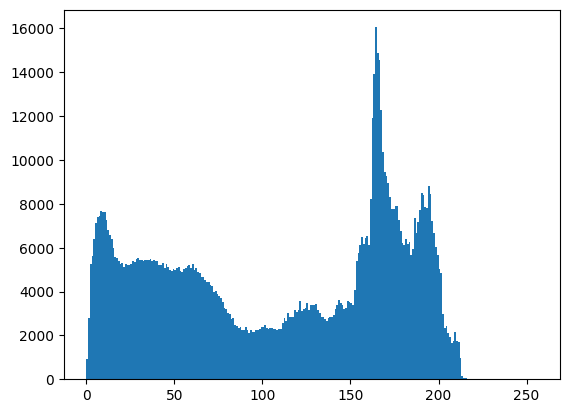

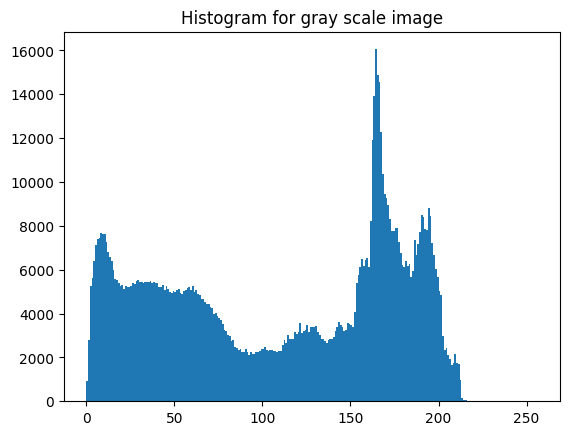

In [11]:
image_gray = cv2.imread(base_dir + 'BBDD/bbdd_00000.jpg', 0)
plt.hist(image_gray.ravel(),256,[0,256])
plt.show()

hist_gray = cv2.calcHist(image_gray, [0], None, [256], [0,256])
plt.hist(image_gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

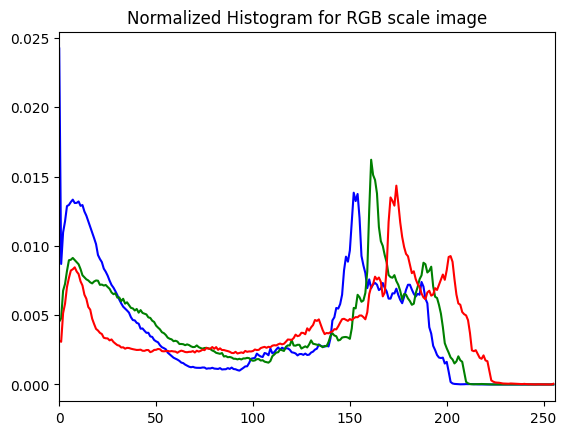

In [12]:
image = cv2.imread(base_dir + 'BBDD/bbdd_00000.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    #histr= cv2.normalize(histr, histr, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    histr /= histr.sum()
    plt.plot(histr,color = col)
    plt.xlim([0,256])

plt.title('Normalized Histogram for RGB scale image')
plt.show()



**Similarity Measures**
https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html

In [13]:
# Applying closing
kernel = np.ones((20,20),np.uint8)

In [29]:
from numpy.ma.core import mean
# import required module
import os
 
class histograms: 
    def __init__(self, hist_grey, hist_red, hist_green, hist_blue): 
        self.hist_grey = hist_grey 
        self.hist_red = hist_red
        self.hist_green = hist_green
        self.hist_blue = hist_blue

# assign directory
directory = base_dir + 'BBDD'
 # creating list       
hist_bbdd = {} 
# iterate over files in
# that directory
for filename in os.scandir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if f.endswith('.jpg'):
        #print(f)
        # split_f = f.split('/')
        # ! For local files (could fail at mac?)
        split_f = f.split('\\')
        f_name = split_f[len(split_f) - 1]
        f_name = f_name.split('.')[0].split('_')[1]
        image = cv2.imread(f)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist_gray = cv2.calcHist(image_gray, [0], None, [256], [0,256])
        cv2.normalize(hist_gray, hist_gray, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_red = cv2.calcHist([image], [0], None, [256], [0, 255])
        cv2.normalize(hist_red, hist_red, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_green = cv2.calcHist([image], [1], None, [256], [0, 255])
        cv2.normalize(hist_green, hist_green, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_blue = cv2.calcHist([image], [2], None, [256], [0, 255])
        cv2.normalize(hist_blue, hist_blue, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_bbdd[f_name] = (histograms(hist_gray, hist_red, hist_green, hist_blue))
        
# assign directory
directory = base_dir + 'qsd1_w1'
 # creating list       
hist_query1 = {} 
# iterate over files in
# that directory
for filename in os.scandir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if f.endswith('.jpg'):
        #print(f)
        # split_f = f.split('/')
        # ! For local files (could fail at mac?)
        split_f = f.split('\\')
        f_name = split_f[len(split_f) - 1]
        f_name = f_name.split('.')[0]
        image = cv2.imread(f)
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hist_gray = cv2.calcHist(image_gray, [0], None, [256], [0,256])
        cv2.normalize(hist_gray, hist_gray, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_red = cv2.calcHist([image], [0], None, [256], [0, 255])
        cv2.normalize(hist_red, hist_red, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_green = cv2.calcHist([image], [1], None, [256], [0, 255])
        cv2.normalize(hist_green, hist_green, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_blue = cv2.calcHist([image], [2], None, [256], [0, 255])
        cv2.normalize(hist_blue, hist_blue, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
        hist_query1[f_name] = (histograms(hist_gray, hist_red, hist_green, hist_blue))



In [32]:
# histogrames per els diferents ESPAIS DE COLOR 

from numpy.ma.core import mean
# import required module
import os
 
class histograms: 
    def __init__(self, hist_ch1, hist_ch2, hist_ch3): 
        self.hist_ch1 = hist_ch1
        self.hist_ch2 = hist_ch2
        self.hist_ch3 = hist_ch3


def get_histograms(directory, colorSpace, notQuery):
    hist_dict = {}
    for filename in os.scandir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if f.endswith('.jpg'):
            #print(f)
            # split_f = f.split('/')
            # ! For local files (could fail at mac?)
            split_f = f.split('\\')
            f_name = split_f[len(split_f) - 1]
            f_name = f_name.split('.')[0]

            if notQuery:
                f_name = f_name.split('_')[1]

            image = cv2.imread(f)

            if colorSpace == "HSV":
                image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)           
            elif colorSpace == "LAB":
                image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)          
            elif colorSpace == "YCrCb":
                image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

            hist_ch1 = cv2.calcHist([image], [0], None, [256], [0, 255])
            #cv2.normalize(hist_ch1, hist_ch1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
            hist_ch1 /= hist_ch1.sum()
            hist_ch2 = cv2.calcHist([image], [1], None, [256], [0, 255])
            #cv2.normalize(hist_ch2, hist_ch2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
            hist_ch2 /= hist_ch2.sum()
            hist_ch3 = cv2.calcHist([image], [2], None, [256], [0, 255])
            #cv2.normalize(hist_ch3, hist_ch3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
            hist_ch3 /= hist_ch3.sum()
            hist_dict[f_name] = (histograms(hist_ch1, hist_ch2, hist_ch3))


    return hist_dict

# assign directory
directory_bbdd = base_dir + 'BBDD'
directory_query = base_dir + 'qsd1_w1'


# creating list       
hist_bbdd_rgb = get_histograms(directory_bbdd, "RGB", True)
hist_query1_rgb = get_histograms(directory_query, "RGB", False)

hist_bbdd_hsv = get_histograms(directory_bbdd, "HSV", True)
hist_query1_hsv = get_histograms(directory_query, "HSV", False)

hist_bbdd_lab = get_histograms(directory_bbdd, "LAB", True)
hist_query1_lab = get_histograms(directory_query, "LAB", False) 

hist_bbdd_ycrcb = get_histograms(directory_bbdd, "YCrCb", True)
hist_query1_ycrcb = get_histograms(directory_query, "YCrCb", False)




In [33]:
hist_query1

{'00000': <__main__.histograms at 0x1e96afc0a90>,
 '00001': <__main__.histograms at 0x1e96f001670>,
 '00002': <__main__.histograms at 0x1e96f001700>,
 '00003': <__main__.histograms at 0x1e96f0017c0>,
 '00004': <__main__.histograms at 0x1e96f001820>,
 '00005': <__main__.histograms at 0x1e96f001880>,
 '00006': <__main__.histograms at 0x1e96f0018e0>,
 '00007': <__main__.histograms at 0x1e96f001910>,
 '00008': <__main__.histograms at 0x1e96f002bb0>,
 '00009': <__main__.histograms at 0x1e96f002c10>,
 '00010': <__main__.histograms at 0x1e96f002c70>,
 '00011': <__main__.histograms at 0x1e96f002cd0>,
 '00012': <__main__.histograms at 0x1e96f002d30>,
 '00013': <__main__.histograms at 0x1e96f002d90>,
 '00014': <__main__.histograms at 0x1e96f002df0>,
 '00015': <__main__.histograms at 0x1e96f002e50>,
 '00016': <__main__.histograms at 0x1e96f002eb0>,
 '00017': <__main__.histograms at 0x1e96f002f10>,
 '00018': <__main__.histograms at 0x1e96f002f70>,
 '00019': <__main__.histograms at 0x1e96f002fd0>,


In [41]:
# DISTANCES --> 
#https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html

def hist_intersection(hist_1, hist_2):
    minim = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minim), np.sum(hist_2))
    return intersection

class distances: 
    instances = {}
    def __init__(self, name, sim_intersection_rgb, sim_correlation_rgb, dist_eucl_rgb, dist_chisq_rgb, dist_heilinger_rgb): 
        # self.dist_eucl_gray = dist_eucl_gray
        self.sim_intersection_rgb = sim_intersection_rgb
        self.sim_correlation_rgb = sim_correlation_rgb
        self.dist_eucl_rgb = dist_eucl_rgb 
        self.dist_chisq_rgb = dist_chisq_rgb
        self.dist_heilinger_rgb = dist_heilinger_rgb
        distances.instances[name] = self

dists = {}

# for key_q, img_query in hist_query1.items():

img_query_test = hist_query1['00000']

def query_measures(img_query_test):
  dists = {}
  
  for key_bbdd, img_bbdd in hist_bbdd.items():

    # dist_eucl_gray = cv2.norm(img_query_test.hist_grey, img_bbdd.hist_grey, normType=cv2.NORM_L2)
    # Intersecion similarity
    # """sim_intersection_red = hist_intersection(img_query_test.hist_red, img_bbdd.hist_red)
    # sim_intersection_blue = hist_intersection(img_query_test.hist_blue, img_bbdd.hist_blue)
    # sim_intersection_green = hist_intersection(img_query_test.hist_green, img_bbdd.hist_green)"""

    sim_intersection_red = cv2.compareHist(img_query_test.hist_red, img_bbdd.hist_red, cv2.HISTCMP_INTERSECT)
    sim_intersection_blue = cv2.compareHist(img_query_test.hist_green, img_bbdd.hist_green, cv2.HISTCMP_INTERSECT)
    sim_intersection_green = cv2.compareHist(img_query_test.hist_blue, img_bbdd.hist_blue, cv2.HISTCMP_INTERSECT)
    sim_intersection_rgb = np.mean(np.array([sim_intersection_red, sim_intersection_blue, sim_intersection_green]))

    # Correlation similarity
    sim_correlation_red = cv2.compareHist(img_query_test.hist_red, img_bbdd.hist_red, cv2.HISTCMP_CORREL)
    sim_correlation_green = cv2.compareHist(img_query_test.hist_green, img_bbdd.hist_green, cv2.HISTCMP_CORREL)
    sim_correlation_blue = cv2.compareHist(img_query_test.hist_blue, img_bbdd.hist_blue, cv2.HISTCMP_CORREL)
    sim_correlation_rgb = np.mean(np.array([sim_correlation_red, sim_correlation_green, sim_correlation_blue]))
    # Euclidean distance
    dist_eucl_red = cv2.norm(img_query_test.hist_red, img_bbdd.hist_red, normType=cv2.NORM_L2)
    dist_eucl_green = cv2.norm(img_query_test.hist_green, img_bbdd.hist_green, normType=cv2.NORM_L2)
    dist_eucl_blue = cv2.norm(img_query_test.hist_blue, img_bbdd.hist_blue, normType=cv2.NORM_L2)
    dist_eucl_rgb = np.mean(np.array([dist_eucl_red, dist_eucl_green, dist_eucl_blue]))
    # Chi square distance
    dist_chisq_red = cv2.compareHist(img_query_test.hist_red, img_bbdd.hist_red, cv2.HISTCMP_CHISQR)
    dist_chisq_green = cv2.compareHist(img_query_test.hist_green, img_bbdd.hist_green, cv2.HISTCMP_CHISQR)
    dist_chisq_blue = cv2.compareHist(img_query_test.hist_blue, img_bbdd.hist_blue, cv2.HISTCMP_CHISQR)
    dist_chisq_rgb = np.mean(np.array([dist_chisq_red, dist_chisq_green, dist_chisq_blue]))
    # Heilinger distance
    dist_heilinger_red = cv2.compareHist(img_query_test.hist_red, img_bbdd.hist_red, cv2.HISTCMP_HELLINGER )
    dist_heilinger_green = cv2.compareHist(img_query_test.hist_green, img_bbdd.hist_green, cv2.HISTCMP_HELLINGER )
    dist_heilinger_blue = cv2.compareHist(img_query_test.hist_blue, img_bbdd.hist_blue, cv2.HISTCMP_HELLINGER )
    dist_heilinger_rgb = np.mean(np.array([dist_heilinger_red, dist_heilinger_green, dist_heilinger_blue]))


    dists[key_bbdd] = distances(key_bbdd, sim_intersection_rgb, sim_correlation_rgb, dist_eucl_rgb, dist_chisq_rgb, dist_heilinger_rgb)
  return dists

dists = query_measures(img_query_test)

In [51]:
# DISTANCES --> PER PROVAR DESPRES DIFERENTS ESPAIS DE COLOR

class distances: 
    instances = {}
    def __init__(self, name, sim_intersection, sim_correlation, dist_eucl, dist_chisq, dist_heilinger): 
        # self.dist_eucl_gray = dist_eucl_gray
        self.sim_intersection = sim_intersection
        self.sim_correlation = sim_correlation
        self.dist_eucl = dist_eucl
        self.dist_chisq = dist_chisq
        self.dist_heilinger = dist_heilinger
        distances.instances[name] = self

dists = {}

def query_measures_colour(hist_query_colourSpace,hist_bbdd_colourSpace):
  dists = {}
  
  for key_bbdd, img_bbdd in hist_bbdd_colourSpace.items():

    # Intersecion similarity
    sim_intersection_ch1 = cv2.compareHist(hist_query_colourSpace.hist_ch1, img_bbdd.hist_ch1, cv2.HISTCMP_INTERSECT)
    sim_intersection_ch2 = cv2.compareHist(hist_query_colourSpace.hist_ch2, img_bbdd.hist_ch2, cv2.HISTCMP_INTERSECT)
    sim_intersection_ch3 = cv2.compareHist(hist_query_colourSpace.hist_ch3, img_bbdd.hist_ch3, cv2.HISTCMP_INTERSECT)
    sim_intersection = np.mean(np.array([sim_intersection_ch1, sim_intersection_ch2, sim_intersection_ch3]))
    # Correlation similarity
    sim_correlation_ch1 = cv2.compareHist(hist_query_colourSpace.hist_ch1, img_bbdd.hist_ch1, cv2.HISTCMP_CORREL)
    sim_correlation_ch2 = cv2.compareHist(hist_query_colourSpace.hist_ch2, img_bbdd.hist_ch2, cv2.HISTCMP_CORREL)
    sim_correlation_ch3 = cv2.compareHist(hist_query_colourSpace.hist_ch3, img_bbdd.hist_ch3, cv2.HISTCMP_CORREL)
    sim_correlation = np.mean(np.array([sim_correlation_ch1, sim_correlation_ch2, sim_correlation_ch3]))
    # Euclidean distance
    dist_eucl_ch1 = cv2.norm(hist_query_colourSpace.hist_ch1, img_bbdd.hist_ch1, normType=cv2.NORM_L2)
    dist_eucl_ch2 = cv2.norm(hist_query_colourSpace.hist_ch2, img_bbdd.hist_ch2, normType=cv2.NORM_L2)
    dist_eucl_ch3 = cv2.norm(hist_query_colourSpace.hist_ch3, img_bbdd.hist_ch3, normType=cv2.NORM_L2)
    dist_eucl = np.mean(np.array([dist_eucl_ch1, dist_eucl_ch2, dist_eucl_ch3]))
    # Chi square distance
    dist_chisq_ch1 = cv2.compareHist(hist_query_colourSpace.hist_ch1, img_bbdd.hist_ch1, cv2.HISTCMP_CHISQR)
    dist_chisq_ch2 = cv2.compareHist(hist_query_colourSpace.hist_ch2, img_bbdd.hist_ch2, cv2.HISTCMP_CHISQR)
    dist_chisq_ch3 = cv2.compareHist(hist_query_colourSpace.hist_ch3, img_bbdd.hist_ch3, cv2.HISTCMP_CHISQR)
    dist_chisq = np.mean(np.array([dist_chisq_ch1, dist_chisq_ch2, dist_chisq_ch3]))
    # Heilinger distance
    dist_heilinger_ch1 = cv2.compareHist(hist_query_colourSpace.hist_ch1, img_bbdd.hist_ch1, cv2.HISTCMP_HELLINGER )
    dist_heilinger_ch2 = cv2.compareHist(hist_query_colourSpace.hist_ch2, img_bbdd.hist_ch2, cv2.HISTCMP_HELLINGER )
    dist_heilinger_ch3 = cv2.compareHist(hist_query_colourSpace.hist_ch3, img_bbdd.hist_ch3, cv2.HISTCMP_HELLINGER )
    dist_heilinger = np.mean(np.array([dist_heilinger_ch1, dist_heilinger_ch2, dist_heilinger_ch3]))

    dists[key_bbdd] = distances(key_bbdd, sim_intersection, sim_correlation, dist_eucl, dist_chisq, dist_heilinger)

  return dists

In [42]:
# sort_by_value = dict(sorted(dists.items(), key=lambda item: item[1].sim_correlation_rgb, reverse = True)[:5])
sort_by_value = dict(sorted(dists.items(), key=lambda item: item[1].dist_heilinger_rgb)[:5])

for key_dist, dist in sort_by_value.items():
    print(f'Sim intersection with {key_dist} is: {dist.sim_intersection_rgb}')
    print(f'Sim correlation  with {key_dist} is: {dist.sim_correlation_rgb}')
    print(f'RGB euclidean distance with {key_dist} is: {dist.dist_eucl_rgb}')
    print(f'RGB chi square distance with {key_dist} is: {dist.dist_chisq_rgb}')
    print(f'RGB Heilinger distance with {key_dist} is: {dist.dist_heilinger_rgb}')
    # print(f'Gray euclidean distance with {key_dist} is: {dist.dist_eucl_gray}')

Sim intersection with 00120 is: 29.410858778004695
Sim correlation  with 00120 is: 0.9524235752684169
RGB euclidean distance with 00120 is: 1.013283330790037
RGB chi square distance with 00120 is: 56.65913438932904
RGB Heilinger distance with 00120 is: 0.1369511389576411
Sim intersection with 00201 is: 31.50949212927723
Sim correlation  with 00201 is: 0.880700855721817
RGB euclidean distance with 00201 is: 2.4560842678093473
RGB chi square distance with 00201 is: 53.02128062629625
RGB Heilinger distance with 00201 is: 0.19270935352561103
Sim intersection with 00229 is: 30.288308903833848
Sim correlation  with 00229 is: 0.8485387086737908
RGB euclidean distance with 00229 is: 2.2294755796442973
RGB chi square distance with 00229 is: 914.1525655396803
RGB Heilinger distance with 00229 is: 0.24022670465038443
Sim intersection with 00048 is: 29.638906944386083
Sim correlation  with 00048 is: 0.6982591838115327
RGB euclidean distance with 00048 is: 3.7156322028975146
RGB chi square distance

In [43]:
#SOLUCIONS DEL QUERY1
import pickle
query1_solutions = {}
with open( base_dir + 'qsd1_w1/gt_corresps.pkl', "rb" ) as f:
	query1_solutions = pickle.load(f)
query1_solutions

[[120],
 [170],
 [277],
 [227],
 [251],
 [274],
 [285],
 [258],
 [117],
 [203],
 [192],
 [22],
 [113],
 [101],
 [174],
 [155],
 [270],
 [47],
 [286],
 [215],
 [262],
 [245],
 [257],
 [182],
 [262],
 [38],
 [238],
 [67],
 [86],
 [133]]

In [45]:
#sistema votacio per distancies

results = {}
for key_q1, img_q1 in hist_query1.items():
  dists = {}
  img_query_test = hist_query1[key_q1]
  dists = query_measures(img_query_test)
  sim_intersection_rgb_top = [int(k) for k, v in sorted(dists.items(), key=lambda item: item[1].sim_intersection_rgb, reverse = True)][0]
  sim_correlation_rgb_top = [int(k) for k, v in sorted(dists.items(), key=lambda item: item[1].sim_correlation_rgb, reverse = True)][0]
  dist_eucl_rgb_top = [int(k) for k, v in sorted(dists.items(), key=lambda item: item[1].dist_eucl_rgb)][0]
  dist_chisq_rgb_top = [int(k) for k, v in sorted(dists.items(), key=lambda item: item[1].dist_chisq_rgb)][0]
  dist_heilinger_rgb_top = [int(k) for k, v in sorted(dists.items(), key=lambda item: item[1].dist_heilinger_rgb)][0]
  votes = [sim_intersection_rgb_top, sim_correlation_rgb_top, dist_eucl_rgb_top, dist_chisq_rgb_top, dist_heilinger_rgb_top]
  best = max(set(votes), key = votes.count)
  results[int(key_q1)] = best


results_array = [[int(v)] for k, v in sorted(results.items(), key=lambda item: item[0])]

correct_count = 0
count = 0
for i in range(len(results_array)):
  if results_array[i] == query1_solutions[i]: 
    correct_count = correct_count + 1
  print('Prediction', results_array[i], '|| Solution', query1_solutions[i])
  count = count + 1

accuracy = correct_count / count
print(f'{correct_count} correct guesses of {count} photos')
print('Accuracy:', accuracy)


Prediction [120] || Solution [120]
Prediction [74] || Solution [170]
Prediction [1] || Solution [277]
Prediction [227] || Solution [227]
Prediction [225] || Solution [251]
Prediction [128] || Solution [274]
Prediction [50] || Solution [285]
Prediction [258] || Solution [258]
Prediction [0] || Solution [117]
Prediction [8] || Solution [203]
Prediction [88] || Solution [192]
Prediction [22] || Solution [22]
Prediction [26] || Solution [113]
Prediction [232] || Solution [101]
Prediction [8] || Solution [174]
Prediction [155] || Solution [155]
Prediction [77] || Solution [270]
Prediction [36] || Solution [47]
Prediction [8] || Solution [286]
Prediction [239] || Solution [215]
Prediction [241] || Solution [262]
Prediction [1] || Solution [245]
Prediction [257] || Solution [257]
Prediction [18] || Solution [182]
Prediction [69] || Solution [262]
Prediction [229] || Solution [38]
Prediction [121] || Solution [238]
Prediction [67] || Solution [67]
Prediction [86] || Solution [86]
Prediction [1

In [49]:
#Accuracy distancies per separat 

results = {}

ordered_query = [k for k, v in sorted(hist_query1.items(), key=lambda item: item[0])]
len_query = len(ordered_query)
methods = ['sim_intersection_rgb', 'sim_correlation_rgb', 'dist_eucl_rgb', 'dist_chisq_rgb', 'dist_heilinger_rgb']
need_reverse = [True, True, False, False, False]
results_dict = {}

# Dict init
for method in methods:
  results_dict[method] = {'top1_count': 0, 'top5_count': 0}

for k_idx, key_q1 in enumerate(ordered_query):
  dists = {}
  img_query_test = hist_query1[key_q1]
  dists = query_measures(img_query_test)
  for m_idx, method in enumerate(methods):
    preds = [int(k) for k, v in sorted(dists.items(), key=lambda item: getattr(item[1], method), reverse = need_reverse[m_idx])][:5]
    if preds[0] == query1_solutions[k_idx][0]:
      results_dict[method]['top1_count'] = results_dict[method]['top1_count'] + 1
      results_dict[method]['top5_count'] = results_dict[method]['top5_count'] + 1
    elif query1_solutions[k_idx][0] in preds:
      results_dict[method]['top5_count'] = results_dict[method]['top5_count'] + 1
  
# for key_r, res in results_dict.items():
for method in methods:
  print(f'For method {method}:')
  # top1_count = results_dict[method]['top1_count']
  # top5_count = results_dict[method]['top5_count']
  # print(f'\tTOP 1 Count: {top1_count}')
  # print(f'\tTOP 5 Count: {top5_count}')
  results_dict[method]['accuracy_top1'] = results_dict[method]['top1_count'] / len_query
  results_dict[method]['accuracy_top5'] = results_dict[method]['top5_count'] / len_query
  accuracy_top1 = results_dict[method]['accuracy_top1']
  accuracy_top5 = results_dict[method]['accuracy_top5']
  print(f'\tTOP 1 Accuracy: {str(round(accuracy_top1 * 100, 2))}%')
  print(f'\tTOP 5 Accuracy: {str(round(accuracy_top5 * 100, 2))}%')

For method sim_intersection_rgb:
	TOP 1 Accuracy: 3.33%
	TOP 5 Accuracy: 6.67%
For method sim_correlation_rgb:
	TOP 1 Accuracy: 26.67%
	TOP 5 Accuracy: 40.0%
For method dist_eucl_rgb:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 46.67%
For method dist_chisq_rgb:
	TOP 1 Accuracy: 23.33%
	TOP 5 Accuracy: 33.33%
For method dist_heilinger_rgb:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 43.33%


In [52]:
#Accuracy distancies per separat en els DIFERENTS ESPAIS DE COLOR

def getAccuracy(hist_query_colourSpace,hist_bbdd_colourSpace):
  results = {}

  ordered_query = [k for k, v in sorted(hist_query_colourSpace.items(), key=lambda item: item[0])]
  len_query = len(ordered_query)
  methods = ['sim_intersection', 'sim_correlation', 'dist_eucl', 'dist_chisq', 'dist_heilinger']
  need_reverse = [True, True, False, False, False]
  results_dict = {}

  # Dict init
  for method in methods:
    results_dict[method] = {'top1_count': 0, 'top5_count': 0}

  for k_idx, key_q1 in enumerate(ordered_query):
    dists = {}
    img_query_test = hist_query_colourSpace[key_q1]
    dists = query_measures_colour(img_query_test,hist_bbdd_colourSpace)
    for m_idx, method in enumerate(methods):
      preds = [int(k) for k, v in sorted(dists.items(), key=lambda item: getattr(item[1], method), reverse = need_reverse[m_idx])][:5]
      if preds[0] == query1_solutions[k_idx][0]:
        results_dict[method]['top1_count'] = results_dict[method]['top1_count'] + 1
        results_dict[method]['top5_count'] = results_dict[method]['top5_count'] + 1 #marcos: aquí no està sumant doble si es troba en el top1? perquè suma en aquest if i en el següent
      elif query1_solutions[k_idx][0] in preds:
        results_dict[method]['top5_count'] = results_dict[method]['top5_count'] + 1 
    
  # for key_r, res in results_dict.items():
  for method in methods:
    print(f'For method {method}:')
    # top1_count = results_dict[method]['top1_count']
    # top5_count = results_dict[method]['top5_count']
    # print(f'\tTOP 1 Count: {top1_count}')
    # print(f'\tTOP 5 Count: {top5_count}')
    results_dict[method]['accuracy_top1'] = results_dict[method]['top1_count'] / len_query
    results_dict[method]['accuracy_top5'] = results_dict[method]['top5_count'] / len_query
    accuracy_top1 = results_dict[method]['accuracy_top1']
    accuracy_top5 = results_dict[method]['accuracy_top5']
    print(f'\tTOP 1 Accuracy: {str(round(accuracy_top1 * 100, 2))}%')
    print(f'\tTOP 5 Accuracy: {str(round(accuracy_top5 * 100, 2))}%')


print("RGB colour space")
getAccuracy(hist_query1_rgb,hist_bbdd_rgb)

print("LAB colour space")
getAccuracy(hist_query1_lab,hist_bbdd_lab)

print("HSV colour space")
getAccuracy(hist_query1_hsv,hist_bbdd_hsv)

print("YCbCr colour space")
getAccuracy(hist_query1_ycrcb,hist_bbdd_ycrcb)



RGB colour space
For method sim_intersection:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 43.33%
For method sim_correlation:
	TOP 1 Accuracy: 26.67%
	TOP 5 Accuracy: 40.0%
For method dist_eucl:
	TOP 1 Accuracy: 20.0%
	TOP 5 Accuracy: 43.33%
For method dist_chisq:
	TOP 1 Accuracy: 23.33%
	TOP 5 Accuracy: 30.0%
For method dist_heilinger:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 43.33%
LAB colour space
For method sim_intersection:
	TOP 1 Accuracy: 43.33%
	TOP 5 Accuracy: 66.67%
For method sim_correlation:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 40.0%
For method dist_eucl:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 40.0%
For method dist_chisq:
	TOP 1 Accuracy: 30.0%
	TOP 5 Accuracy: 40.0%
For method dist_heilinger:
	TOP 1 Accuracy: 46.67%
	TOP 5 Accuracy: 76.67%
HSV colour space
For method sim_intersection:
	TOP 1 Accuracy: 36.67%
	TOP 5 Accuracy: 63.33%
For method sim_correlation:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 40.0%
For method dist_eucl:
	TOP 1 Accuracy: 33.33%
	TOP 5 Accuracy: 40.

In [ ]:
img_query_test = hist_query1_rgb['00000']
dists = query_measures_colour(img_query_test,hist_bbdd_rgb)
preds = [int(k) for k, v in sorted(dists.items(), key=lambda item: getattr(item[1], 'dist_eucl'), reverse = False)][:5]
preds

[120, 201, 229, 7, 263]

NameError: ignored

In [53]:
#Accuracy distancies per separat en els DIFERENTS ESPAIS DE COLOR y aplicant un SISTEMA DE VOTACIÓ PER EL TOP1 A PARTIR DEL TOP5

def getAccuracy_votingTop5(hist_query_colourSpace,hist_bbdd_colourSpace):
  results = {}

  ordered_query = [k for k, v in sorted(hist_query_colourSpace.items(), key=lambda item: item[0])]
  len_query = len(ordered_query)
  len_bbdd = len(hist_bbdd_colourSpace)
  methods = ['sim_intersection', 'sim_correlation', 'dist_eucl', 'dist_chisq', 'dist_heilinger']
  need_reverse = [True, True, False, False, False]
  results_dict = {}
  llista_zeros=np.zeros((len_bbdd,), dtype=int)
  # Dict init
  for method in methods:
    results_dict[method] = {'voting': llista_zeros }
  count = 0


  for k_idx, key_q1 in enumerate(ordered_query):
    dists = {}
    img_query_test = hist_query_colourSpace[key_q1]
    dists = query_measures_colour(img_query_test,hist_bbdd_colourSpace)
    for m_idx, method in enumerate(methods):
      preds = [int(k) for k, v in sorted(dists.items(), key=lambda item: getattr(item[1], method), reverse = need_reverse[m_idx])][:5] #conté el Top5
      results_dict[method]['voting'][preds[0]] = results_dict[method]['voting'][preds[0]] + 5
      results_dict[method]['voting'][preds[1]] = results_dict[method]['voting'][preds[1]] + 4
      results_dict[method]['voting'][preds[2]] = results_dict[method]['voting'][preds[2]] + 3
      results_dict[method]['voting'][preds[3]] = results_dict[method]['voting'][preds[3]] + 2
      results_dict[method]['voting'][preds[4]] = results_dict[method]['voting'][preds[4]] + 1 

    list_voted = np.zeros((len_bbdd,), dtype=int)
    for method in methods:
      list_voted[list(results_dict[method]['voting']).index(max(results_dict[method]['voting']))] = list_voted[list(results_dict[method]['voting']).index(max(results_dict[method]['voting']))] + 1
      results_dict[method]['voting'] = np.zeros((len_bbdd,), dtype=int)

    if list(list_voted).index(max(list_voted)) == query1_solutions[k_idx][0]:
        count = count + 1
    

  print(f'\tTOP 1 Accuracy: {str(round((count /len_query) * 100, 2))}%')
  



print("RGB colour space")
getAccuracy_votingTop5(hist_query1_rgb,hist_bbdd_rgb)

print("LAB colour space")
getAccuracy_votingTop5(hist_query1_lab,hist_bbdd_lab)

print("HSV colour space")
getAccuracy_votingTop5(hist_query1_hsv,hist_bbdd_hsv)

print("YCbCr colour space")
getAccuracy_votingTop5(hist_query1_ycrcb,hist_bbdd_ycrcb)


RGB colour space
	TOP 1 Accuracy: 30.0%
LAB colour space
	TOP 1 Accuracy: 46.67%
HSV colour space
	TOP 1 Accuracy: 36.67%
YCbCr colour space
	TOP 1 Accuracy: 33.33%


Distancies :
https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html

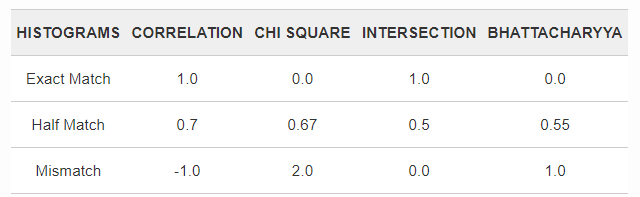

In [54]:
# DISTANCES --> INTERSECTION method
#https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html

def hist_intersection(hist_1, hist_2):
    minim = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minim), np.sum(hist_2))
    return intersection




In [ ]:
pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ml_metrics-0.1.4-py3-none-any.whl


La funció mapk de la llibreria ml_metrics no funciona perquè està malament definida al github. Però he copiar les funcions i les he corregit. Així que utilitzar la funció mapk directament

In [25]:
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(actual,predicted,k) for a,p in zip(actual, predicted)])

In [39]:
import ml_metrics as metrics

mapk([2],[0,2,3,4,1],k=1)


0.0

**Mask test**

Primera aproximació color mask, utilitzant imatge bbdd_00001 suposant que es tracta d'una mitjana dels backgrounds (per això és la única a la bbdd amb una mask totalment negra)

In [55]:
mask_avg = cv2.imread(base_dir + 'BBDD/bbdd_00001.jpg')
mask_avg_color = mask_avg[0][0]
m_avg_r = mask_avg_color[0]
m_avg_g = mask_avg_color[1]
m_avg_b = mask_avg_color[2]

Iteració sobre tots els pixels de background de la query dos per extreure el background mitjà "real".

In [56]:
test_mask = cv2.imread(base_dir + 'qsd2_w1/00000.png')

height, width, _ = test_mask.shape

In [57]:
n_photos = 29
total_r, total_g, total_b, total_pixels = 0, 0, 0, 0

for photo_name in range(n_photos + 1):
  photo_name = str(photo_name)
  if len(photo_name) < 2: photo_name = '0' + photo_name
  # Load photo
  photo = cv2.imread(base_dir + f'qsd2_w1/000{photo_name}.jpg')
  # Load mask
  mask = cv2.imread(base_dir + f'qsd2_w1/000{photo_name}.png')

  height, width, _ = photo.shape
  for i in range(height):
    for j in range(width):
      if mask[i, j, 0] == 0:
        total_r = total_r + photo[i, j, 0]
        total_g = total_g + photo[i, j, 1]
        total_b = total_b + photo[i, j, 2]
        total_pixels = total_pixels + 1

El color mitjà del background de la query 2 es: **(151, 163, 173)**
Ho deixo escrit perque l'execució triga uns <3 minuts

In [58]:
m_avg_r = total_r // total_pixels
m_avg_g = total_g // total_pixels
m_avg_b = total_b // total_pixels

print(f"({m_avg_r}, {m_avg_g}, {m_avg_b})")

(151, 163, 173)


In [59]:
test_image = cv2.imread(base_dir + 'qsd2_w1/00021.jpg')
r_tolerance = 30
g_tolerance = 30
b_tolerance = 30

bool_mask =  (
        (test_image[:,:,0] < (m_avg_r + r_tolerance)) & (test_image[:,:,0] > (m_avg_r - r_tolerance)) &
        (test_image[:,:,1] < (m_avg_g + g_tolerance)) & (test_image[:,:,1] > (m_avg_g - g_tolerance)) & 
        (test_image[:,:,2] < (m_avg_b + b_tolerance)) & (test_image[:,:,2] > (m_avg_b - b_tolerance))
        )

height, width = bool_mask.shape

rgb_mask = np.empty((height, width, 3), dtype=np.uint8)
for i in range(height):
  for j in range(width):
    if bool_mask[i, j] == True:
      rgb_mask[i, j] = np.array([0, 0, 0])
    else:
      rgb_mask[i, j] = np.array([255, 255, 255])

**IDEA:** Utilitzar HSV per obviar la V(?) per tractar de detectar també les ombres.

In [61]:
# show the image, provide window name first
cv2.imshow('rgb_mask', rgb_mask)
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()

In [81]:
photo_bgr = cv2.imread(base_dir + f'qsd2_w1/00000.jpg')
photo = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV image', photo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [84]:
n_photos = 29
total_h, total_s, total_v, total_pixels = 0, 0, 0, 0

for photo_name in range(n_photos + 1):
  photo_name = str(photo_name)
  if len(photo_name) < 2: photo_name = '0' + photo_name
  # Load photo
  photo_bgr = cv2.imread(base_dir + f'qsd2_w1/000{photo_name}.jpg')
  photo = cv2.cvtColor(photo_bgr, cv2.COLOR_BGR2HSV)

  # Load mask
  mask = cv2.imread(base_dir + f'qsd2_w1/000{photo_name}.png')



  height, width, _ = photo.shape
  for i in range(height):
    for j in range(width):
      if mask[i, j, 0] == 0:
        total_h = total_h + photo[i, j, 0]
        total_s = total_s + photo[i, j, 1]
        total_v = total_v + photo[i, j, 2]
        total_pixels = total_pixels + 1

In [85]:
m_avg_h = total_h // total_pixels
m_avg_s = total_s // total_pixels
m_avg_v = total_v // total_pixels

print(f"({m_avg_h}, {m_avg_s}, {m_avg_v})")
print(f"Real HSV values: ({m_avg_h * 2}, {m_avg_s * (1/2.55)}, {m_avg_v * (1/2.55)})")

(23, 37, 174)
Real HSV values: (46, 14.50980392156863, 68.23529411764707)


In [96]:
test_image_bgr = cv2.imread(base_dir + 'qsd2_w1/00021.jpg')
test_image = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2HSV)

h_tolerance = 15
s_tolerance = 30 * 2.55
v_tolerance = 30 * 2.55

bool_mask =  (
        (test_image[:,:,0] < (m_avg_h + h_tolerance)) & (test_image[:,:,0] > (m_avg_h - h_tolerance)) &
        (test_image[:,:,1] < (m_avg_s + s_tolerance)) & (test_image[:,:,1] > (m_avg_s - s_tolerance)) &
        (test_image[:,:,2] < (m_avg_v + v_tolerance)) & (test_image[:,:,2] > (m_avg_v - v_tolerance)) 
        )

height, width = bool_mask.shape

h_mask = np.empty((height, width, 3), dtype=np.uint8)
for i in range(height):
  for j in range(width):
    if bool_mask[i, j] == True:
      h_mask[i, j] = np.array([0, 0, 0])
    else:
      h_mask[i, j] = np.array([255, 255, 255])

In [97]:
# show the image, provide window name first
cv2.imshow('h_mask', h_mask)
# add wait key. window waits until user presses a key
cv2.waitKey(0)
# and finally destroy/close all open windows
cv2.destroyAllWindows()

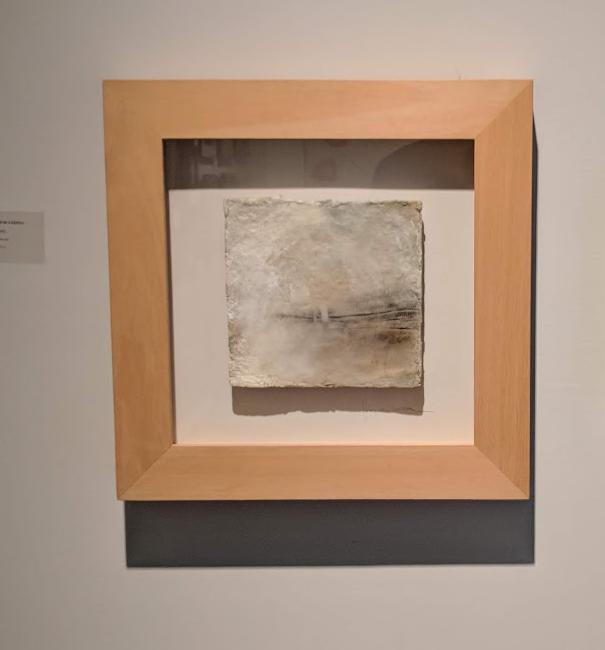

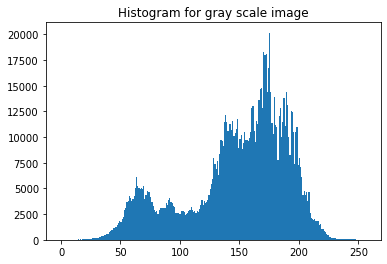

In [ ]:
image = cv2.imread(base_dir + 'qsd2_w1/00000.jpg')
cv2_imshow(image)
hist_gray = cv2.calcHist(image, [0], None, [256], [0,256])
plt.hist(image.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()